In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [3]:
# the transfer matrix at temperature  𝑇  with external field  𝐵
J = 1
kB = 1
def transfer_matrix(T,B):
    beta = 1/(kB*T)
    return np.array([[np.exp(beta*J+beta*B),np.exp(-beta*J)],
                    [np.exp(-beta*J),np.exp(beta*J-beta*B)]])


In [4]:
#the eivenvalues of the transfer matrix 
def eigenvalues(T,B):
    return np.linalg.eigvalsh(transfer_matrix(T,B)) #算matrix的eignevalue
#the exact results
def lambda0(T,B):
    beta = 1/(kB*T)
    lambda1 = np.exp(beta*J)*np.cosh(beta*B) + (np.exp(-2*beta*J)+np.exp(2*beta*J)*np.sinh(beta*B)**2)**0.5
    lambda2 = np.exp(beta*J)*np.cosh(beta*B) - (np.exp(-2*beta*J)+np.exp(2*beta*J)*np.sinh(beta*B)**2)**0.5 
    return np.array([round(lambda2,8),round(lambda1,8)])
T = 1
B = 1
print(eigenvalues(T,B))
print(lambda0(T,B))

[0.97888741 7.41016869]
[0.97888741 7.41016869]


In [5]:
#partition function 𝑍  
N, T, B = 100, 1, 1
z = np.array(transfer_matrix(T,B)**N)
Z = np.trace(z)
print (Z)
#the exact results
def  lambda1(T,B):
    beta = 1/(kB*T)
    return np.exp(beta*J)*np.cosh(beta*B) + (np.exp(-2*beta*J)+np.exp(2*beta*J)*np.sinh(beta*B)**2)**0.5
def  lambda2(T,B):
    beta = 1/(kB*T)
    return np.exp(beta*J)*np.cosh(beta*B) - (np.exp(-2*beta*J)+np.exp(2*beta*J)*np.sinh(beta*B)**2)**0.5
print (lambda1(T,B)**N + lambda2(T,B)**N)

7.225973768125767e+86
9.611905178281457e+86


In [52]:
# evaluate correlation function⟨𝑆0𝑆𝑗⟩
N, T, B = 3, 1, 1
Tz = np.array([[1,0],
               [0,-1]]) #impurity_matrix = Tz
TM = transfer_matrix(T,B)
s0sj = np.zeros(N+1) #製造一個list存放J = 1 to N 時算出的每個correlation function
for j in range(N):
    z = np.eye(2)
    Z_s0sj = Tz
    for k in range (N):
        z = z @ TM
        if k == j :
            Z_s0sj = Z_s0sj @ Tz @ TM
        else:
            Z_s0sj = Z_s0sj @ TM
    s0sj[j] = np.trace(Z_s0sj)/np.trace(z)
    s0sj[N] = s0sj[0] #因為PBC
    print(s0sj[j])


1.0
0.9888647532278549
0.9888647532278549


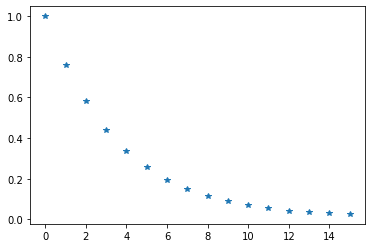

In [60]:
# Plot  ⟨𝑆0𝑆𝑗⟩  up to  𝑗=𝑁/2  
N, T, B = 32, 1, 0
Tz = np.array([[1,0],
               [0,-1]]) #impurity_matrix = Tz
TM = transfer_matrix(T,B)
s0sj = np.zeros(N+1) #製造一個list存放J = 1 to N 時算出的每個correlation function
for j in range(N):
    z = np.eye(2)
    Z_s0sj = Tz
    for k in range (N):
        z = z @ TM
        if k == j :
            Z_s0sj = Z_s0sj @ Tz @ TM
        else:
            Z_s0sj = Z_s0sj @ TM
    s0sj[j] = np.trace(Z_s0sj)/np.trace(z)
    s0sj[N] = s0sj[0] #因為PBC
plt.plot(s0sj[0:int(N/2)],"*")
plt.xlabel("sites")
plt.ylabel("the value of correlation function")

D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in matmul
D:\anaconda\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in matmul
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:1686: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


the largest  𝑁 is 629


D:\anaconda\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in matmul


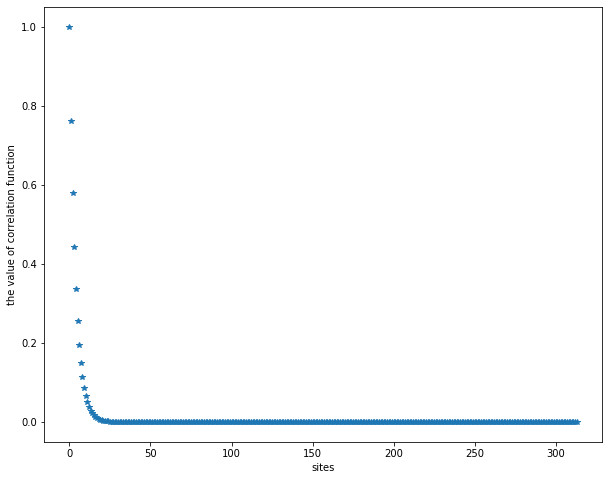

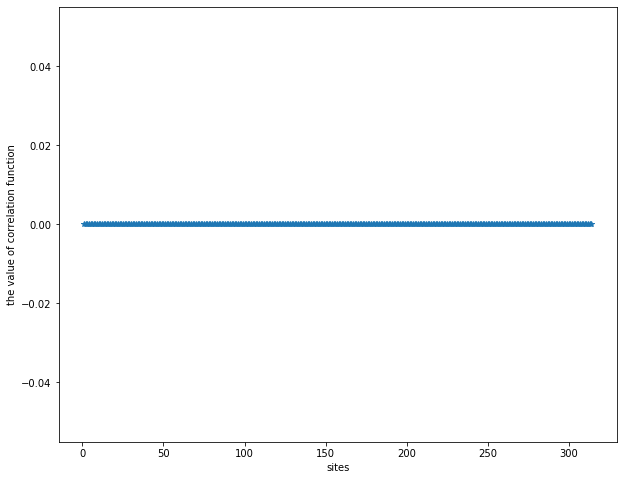

In [91]:
#Please try several  𝑁 ,  𝑇 ,  𝐵 . (1)What is the largest  𝑁  you can go? (2)What is the lowest  𝑇  you can go?
# (1)
N, T, B = 629, 1, 0
Tz = np.array([[1,0],
               [0,-1]]) #impurity_matrix = Tz
TM = transfer_matrix(T,B)
s0sj = np.zeros(N+1) #製造一個list存放J = 1 to N 時算出的每個correlation function
for j in range(N):
    z = np.eye(2)
    Z_s0sj = Tz
    for k in range (N):
        z = z @ TM
        if k == j :
            Z_s0sj = Z_s0sj @ Tz @ TM
        else:
            Z_s0sj = Z_s0sj @ TM
    s0sj[j] = np.trace(Z_s0sj)/np.trace(z)
    s0sj[N] = s0sj[0] #因為PBC
plt.figure(figsize = (10,8))
plt.plot(s0sj[0:int(N/2)],"*")
plt.xlabel("sites")
plt.ylabel("the value of correlation function")

N, T, B = 630, 1, 0
Tz = np.array([[1,0],
               [0,-1]]) #impurity_matrix = Tz
TM = transfer_matrix(T,B)
s0sj = np.zeros(N+1) #製造一個list存放J = 1 to N 時算出的每個correlation function
for j in range(N):
    z = np.eye(2)
    Z_s0sj = Tz
    for k in range (N):
        z = z @ TM
        if k == j :
            Z_s0sj = Z_s0sj @ Tz @ TM
        else:
            Z_s0sj = Z_s0sj @ TM
    s0sj[j] = np.trace(Z_s0sj)/np.trace(z)
    s0sj[N] = s0sj[0] #因為PBC
plt.figure(figsize = (10,8))
plt.plot(s0sj[0:int(N/2)],"*")
plt.xlabel("sites")
plt.ylabel("the value of correlation function")
print("the largest  𝑁 is 629")

the lowest  𝑇  is 0.2


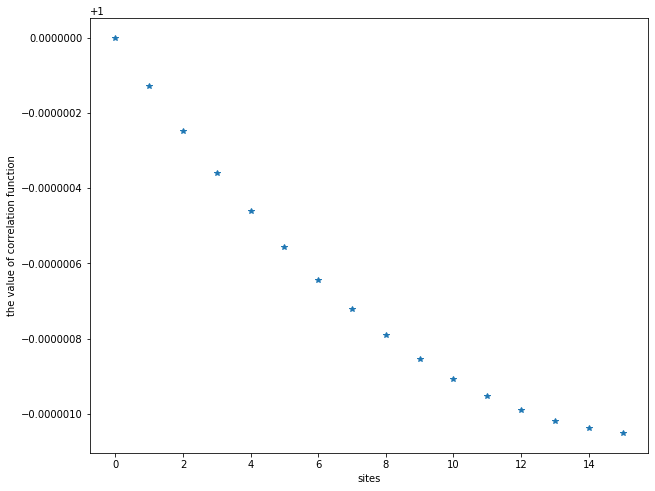

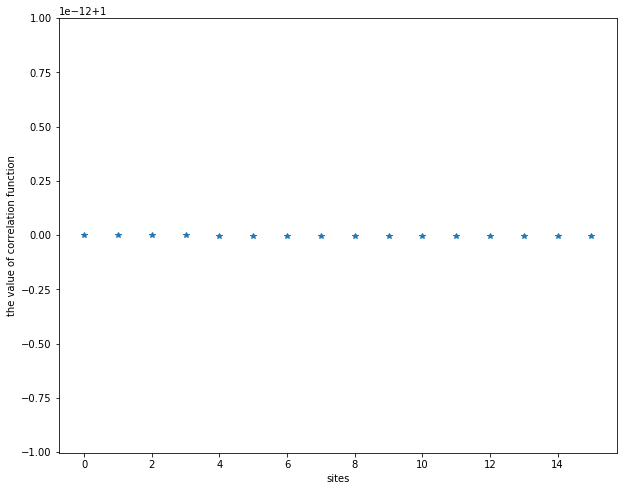

In [90]:
N, T, B = 32, 0.2, 0
Tz = np.array([[1,0],
               [0,-1]]) #impurity_matrix = Tz
TM = transfer_matrix(T,B)
s0sj = np.zeros(N+1) #製造一個list存放J = 1 to N 時算出的每個correlation function
for j in range(N):
    z = np.eye(2)
    Z_s0sj = Tz
    for k in range (N):
        z = z @ TM
        if k == j :
            Z_s0sj = Z_s0sj @ Tz @ TM
        else:
            Z_s0sj = Z_s0sj @ TM
    s0sj[j] = np.trace(Z_s0sj)/np.trace(z)
    s0sj[N] = s0sj[0] #因為PBC
plt.figure(figsize = (10,8))
plt.plot(s0sj[0:int(N/2)],"*")
plt.xlabel("sites")
plt.ylabel("the value of correlation function")

N, T, B = 32, 0.1, 0
Tz = np.array([[1,0],
               [0,-1]]) #impurity_matrix = Tz
TM = transfer_matrix(T,B)
s0sj = np.zeros(N+1) #製造一個list存放J = 1 to N 時算出的每個correlation function
for j in range(N):
    z = np.eye(2)
    Z_s0sj = Tz
    for k in range (N):
        z = z @ TM
        if k == j :
            Z_s0sj = Z_s0sj @ Tz @ TM
        else:
            Z_s0sj = Z_s0sj @ TM
    s0sj[j] = np.trace(Z_s0sj)/np.trace(z)
    s0sj[N] = s0sj[0] #因為PBC
plt.figure(figsize = (10,8))
plt.plot(s0sj[0:int(N/2)],"*")
plt.xlabel("sites")
plt.ylabel("the value of correlation function")
print("the lowest  𝑇  is 0.2")